In [2]:
%run TableCuts.ipynb

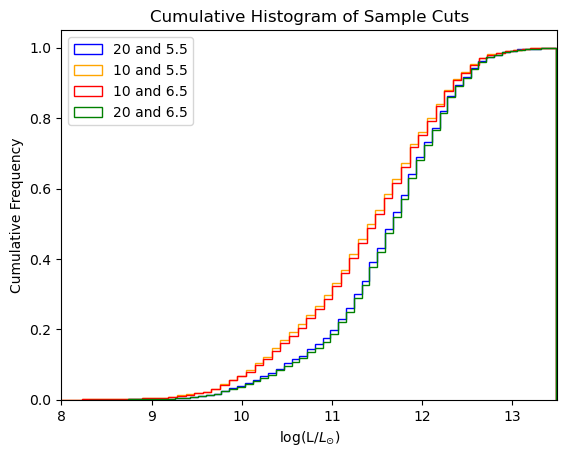

In [41]:
# Cumulative Histograms for W3 Luminosity
#0.01<z<0.02 redshift cut

fig, ax = plt.subplots()
plt.hist(np.log10(W3Lum(cuttab1)),bins=60,histtype='step',fill=False,color='blue',cumulative=True,density=True,label='20 and 5.5')
plt.hist(np.log10(W3Lum(cuttab2)),bins=60,histtype='step',fill=False,color='orange',cumulative=True,density=True,label='10 and 5.5')
plt.hist(np.log10(W3Lum(cuttab3)),bins=60,histtype='step',fill=False,color='red',cumulative=True,density=True,label='10 and 6.5')
plt.hist(np.log10(W3Lum(cuttab4)),bins=60,histtype='step',fill=False,color='green',cumulative=True,density=True,label='20 and 6.5')
plt.title('Cumulative Histogram of Sample Cuts')
plt.xlabel('log(L/$L_{\odot}$)')
plt.ylabel('Cumulative Frequency')
plt.xlim(8,13.5)
plt.legend()

warnings.filterwarnings('ignore',category=RuntimeWarning)

#### From this plot it appears that the snr=10 cuts have a median at slightly lower luminosities than the snr=20 cuts which is to be expected since the lower snr cuts should have more less luminous galaxies in them.

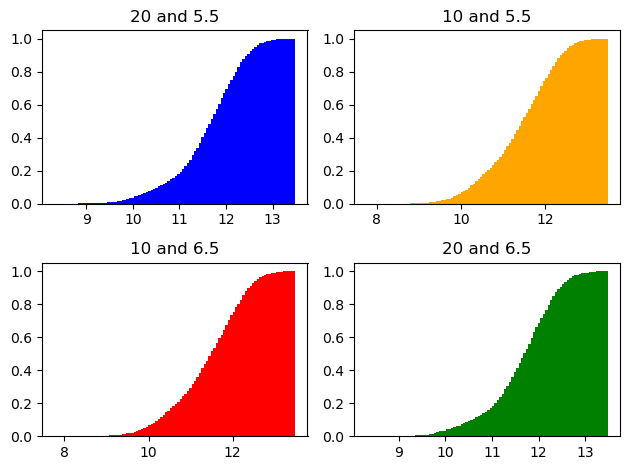

In [23]:
# Plot cut samples and full sample

fig, axs = plt.subplots(2,2)
axs[0,0].hist(np.log10(W3Lum(cuttab1)),bins=100,color='blue',cumulative=True,density=True)
axs[0,0].set_title('20 and 5.5')

axs[0,1].hist(np.log10(W3Lum(cuttab2)),bins=100,color='orange',cumulative=True,density=True)
axs[0,1].set_title('10 and 5.5')

axs[1,0].hist(np.log10(W3Lum(cuttab3)),bins=100,color='red',cumulative=True,density=True)
axs[1,0].set_title('10 and 6.5')

axs[1,1].hist(np.log10(W3Lum(cuttab4)),bins=100,color='green',cumulative=True,density=True)
axs[1,1].set_title('20 and 6.5')

fig.tight_layout()


warnings.filterwarnings('ignore',category=RuntimeWarning)

In [45]:
# KS Test
import scipy

bins = 60 
freq1, bins = np.histogram(np.log10(W3Lum(cuttab1)),bins=60)
freq4, bins = np.histogram(np.log10(W3Lum(cuttab4)),bins=60)
cf1 = np.cumsum(freq1)
cf4 = np.cumsum(freq4)

freq2, bins = np.histogram(np.log10(W3Lum(cuttab2)),bins=60)
freq3, bins = np.histogram(np.log10(W3Lum(cuttab3)),bins=60)
cf2 = np.cumsum(freq2)
cf3 = np.cumsum(freq3)

kssnr = scipy.stats.kstest(cf1,cf4) #SNR=20, 5.5<size<6.5
kssize = scipy.stats.kstest(cf2,cf3) #size=6.5, 10<SNR<20

print(kssnr)
print(kssize)

KstestResult(statistic=0.8, pvalue=2.1824498281334145e-19, statistic_location=3826, statistic_sign=-1)
KstestResult(statistic=0.7833333333333333, pvalue=1.8131121649108368e-18, statistic_location=5375, statistic_sign=-1)


#### Here the p values are low, below 0.05, for both tests. This suggests that these datasets are likely not from the same distribution.